 # **Linear Regression**

### **A. CHUẨN BỊ DỮ LIỆU**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 7.91MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [3]:
mv /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv /content/

In [4]:
import pandas as pd
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### **B. HUẤN LUYỆN MÔ HÌNH**

#### I. ĐỌC VÀ XỬ LÍ DỮ LIỆU

In [5]:
#dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  result = [row[index] for row in data]
  return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  area_data = get_column(data, 1)

  bedrooms_data = get_column(data, 2)

  bathrooms_data = get_column(data, 3)

  stories_data = get_column(data, 4)

  price_data = get_column(data, 0)

  X = [area_data, bedrooms_data, bathrooms_data, stories_data]

  Y = price_data

  return X, Y

#### II. XÂY DỰNG HÀM

In [6]:
def initialize_params():
  w1 = random.gauss(mu = 0.0, sigma = 0.01)
  w2 = random.gauss(mu = 0.0, sigma = 0.01)
  w3 = random.gauss(mu = 0.0, sigma = 0.01)
  w4 = random.gauss(mu = 0.0, sigma = 0.01)
  b = 0
  return w1, w2, w3, w4, b

def predict(x1, x2, x3, x4, w1, w2, w3, w4, b):
  result = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b
  return result

def compute_loss_mse(y, y_hat):
  loss = (y - y_hat)**2
  return loss

def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2*(y_hat- y)
  return dl_db

def update_weight_wi(wi, dl_dwi, lr):
  wi_new = wi - lr*dl_dwi
  return wi_new

def update_weight_b(b, dl_db, lr):
  b_new = b - lr*dl_db
  return b_new

#### III. KHAI TRIỂN LINEAR REGRESSION

In [7]:
#n-samples
def implement_linear_regression_nsamples(X_data, Y_data, epoch_max = 50, lr = 1e-5):
  # Scale features using Min-Max Scaling
  losses = []

  w1, w2, w3, w4, b = initialize_params()
  N = len(Y_data)
  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    dw4_total = 0.0

    db_total = 0.0
    for i in range(N):
      #get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]
      x4 = X_data[3][i]

      y = Y_data[i]

      #compute output
      y_hat = predict(x1, x2, x3, x4,  w1, w2, w3, w4, b)

      #compute loss
      loss = compute_loss_mse(y, y_hat)

      #accumulate loss
      loss_total += loss

      #compute gradient w1, w2, w3, w4, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_dw4 = compute_gradient_wi(x4, y, y_hat)

      dl_db = compute_gradient_b(y, y_hat)

      #accumulate gradient
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      dw4_total += dl_dw4

      db_total += dl_db

    #after processing n samples - update parameters
    w1 -= lr * (dw1_total / N)
    w2 -= lr * (dw2_total / N)
    w3 -= lr * (dw3_total / N)
    w4 -= lr * (dw4_total / N)

    b -= lr * (db_total / N)

    # Ghi lại loss trung bình của epoch
    losses.append(loss_total / N)
  return w1, w2, w3, w4, b, losses

#### IV. HUẤN LUYỆN MÔ HÌNH ( TRƯỚC KHI CHUẨN HÓA DỮ LIỆU )

In [10]:
X,Y=prepare_data("/content/Housing.csv")

[26213392457221.125, 8.891715435814357e+18, 3.457551124221088e+24, 1.3444722069985744e+30, 5.227993601397787e+35, 2.0329105320274812e+41, 7.904992902292949e+46, 3.0738643831502043e+52, 1.1952752346252763e+58, 4.6478396846003584e+63, 1.8073171022001746e+69, 7.027770597871022e+74, 2.7327556141738996e+80, 1.062634749213544e+86, 4.132065832668601e+91, 1.6067579248790519e+97, 6.247894234285034e+102, 2.4294999114910643e+108, 9.447134664261066e+113, 3.673527747111893e+119, 1.4284549324624757e+125, 5.554561267927225e+130, 2.1598966952335408e+136, 8.39877986586982e+141, 3.265873936980729e+147, 1.2699383413528025e+153, 4.938167920617513e+158, 1.920211526666652e+164, 7.466761694653772e+169, 2.903457740488163e+175, 1.1290124414760117e+181, 4.390176151808968e+186, 1.7071243801985733e+192, 6.638170197948742e+197, 2.581259109650178e+203, 1.0037251821610346e+209, 3.902995392976012e+214, 1.5176836556789668e+220, 5.901528049098655e+225, 2.2948150745365328e+231, 8.923411330942378e+236, 3.4698774060159417

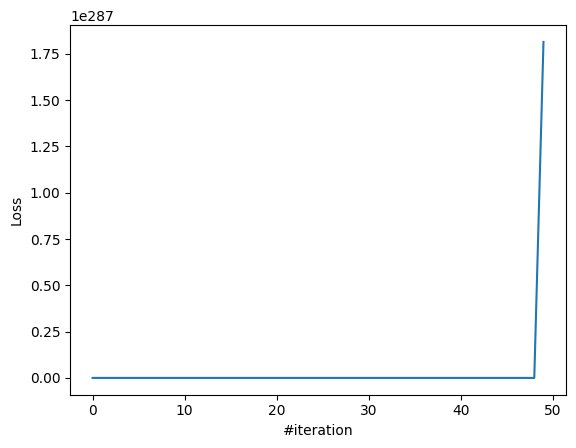

In [22]:
(w1, w2, w3, w4, b, losses) = implement_linear_regression_nsamples(X, Y)

print(losses)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

####  V. HUẤN LUYỆN MÔ HÌNH ( SAU KHI CHUẨN HÓA DỮ LIỆU )

In [16]:
def min_max_scaling(data1, data2, data3, data4):
    # Calculate max and min values for each dataset
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)
    max_data_4 = max(data4)
    print(max_data_1, max_data_2, max_data_3, max_data_4)
    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)
    min_data_4 = min(data4)

    # Normalize data1
    data1_normalized = [(x - min_data_1) / (max_data_1 - min_data_1) for x in data1]

    # Normalize data2
    data2_normalized = [(x - min_data_2) / (max_data_2 - min_data_2) for x in data2]

    # Normalize data3
    data3_normalized = [(x - min_data_3) / (max_data_3 - min_data_3) for x in data3]

    # Normalize data4
    data4_normalized = [(x - min_data_4) / (max_data_4 - min_data_4) for x in data4]


    # Return normalized data and the min/max values
    return [data1_normalized, data2_normalized, data3_normalized, data4_normalized]


In [18]:
def min_max_scaling_Y(Y):
    # Calculate max and min values for each dataset
    max_price = max(Y)
    min_price = min(Y)
    Y_normalized = [(y - min_price) / (max_price - min_price) for y in Y]
    return Y_normalized

In [19]:
#X_normalized & Y_normalized la dataset sau khi duoc chuan hoa
X_normalized = min_max_scaling(X[0], X[1], X[2], X[3])
Y_normalized = min_max_scaling_Y(Y)

16200.0 6.0 4.0 4.0


[0.09357085455814049, 0.060533308635234206, 0.042455634396170124, 0.03253701903361543, 0.0270689008652603, 0.024028942714475063, 0.02231431699416174, 0.02132361135782344, 0.020728839270651313, 0.020351115952586377, 0.020092863681237392, 0.019900842900085702, 0.01974599282706741, 0.019612438387055026, 0.01949149559751601, 0.019378402642026456, 0.01927053727883536, 0.019166444757819288, 0.01906530771340529, 0.018966657070461024, 0.018870214376779167, 0.018775805804014535, 0.018683315230571512, 0.018592658636800742, 0.018503770122590416, 0.01841659426335932, 0.018331081923040032, 0.01824718795277861, 0.018164869918507378, 0.018084087390130794, 0.018004801537504736, 0.017926974894238928, 0.017850571213522636, 0.017775555374624004, 0.01770189331749853, 0.017629551993186776, 0.017558499323268455, 0.017488704164686855, 0.017420136277919666, 0.017352766297379234, 0.017286565703419868, 0.017221506795600274, 0.01715756266699688, 0.017094707179445483, 0.01703291493963175, 0.016972161275977202, 0.

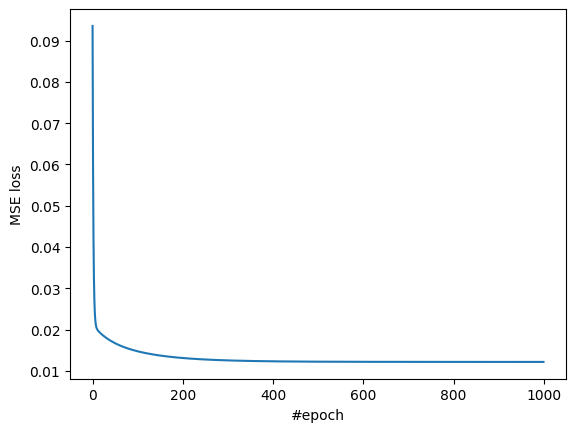

In [20]:
(w1, w2, w3, w4, b, losses) = implement_linear_regression_nsamples(X_normalized,Y_normalized, epoch_max = 1000, lr = 1e-1)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE loss")
plt.show()